In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv


In [2]:
# Specify the correct encoding when reading the CSV file
# df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv')  
df = pd.read_csv('/kaggle/input/positive-and-negative-test-cases/Labelled_Test_Cases.csv', encoding='latin1') 
# Try 'ISO-8859-1' or 'utf-16' if needed

In [3]:
# Encode labels to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])

In [4]:
# Shows the amount of rows and columns in the dataframe
df.shape

(3000, 5)

In [5]:
#shows the first 10 lines of data
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,A customer cannot stream a movie if they purc...,NaN,NaN,NaN
1,0,A database management system such as Oracle D...,NaN,NaN,NaN
2,0,All credit card information will be not be se...,NaN,NaN,NaN
3,0,Not all movies shall be streamed on demand at ...,NaN,NaN,NaN
4,0,An employee is unable to successfully use the...,NaN,NaN,NaN
5,0,Any interface between a user and the automate...,NaN,NaN,NaN
6,0,"Table constraints like a Primary key, Foreign ...",NaN,NaN,NaN
7,0,File selection dialog does not show supported ...,NaN,NaN,NaN
8,0,Field length shown to the user on the page and...,NaN,NaN,NaN
9,0,Cancel button functionality is not working in ...,NaN,NaN,NaN


In [6]:
# Keep only the first and second columns
columns_to_keep = ['v1', 'v2']
df = df[columns_to_keep]

In [7]:
# Checking null values(optional)
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
# To see amount per label(optional) 
df.v1.value_counts()

v1
1    2100
0     900
Name: count, dtype: int64

In [9]:
# Model Development

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results in a structured format
results = []

# Iterate through classifiers
for name, clf in classifiers.items():
    # Build a corpus from the 'Test Case/v2' column
    corpus = df['v2'].tolist()

    # Create a Bag-of-Words model using CountVectorizer(to convert the text data into numerical features) 
    # and TfidfTransformer(commonly used to normalize and scale the term frequencies)
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    classifier = clf

    # Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the classifier
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('transformer', transformer),
        ('classifier', classifier)
    ])

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(corpus, df['v1'], test_size=0.3, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    print(f'\nResults for {name}:')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', report)

    # Append results to the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Report': report
    })





Results for Multinomial Naive Bayes:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.43      0.58       288
           1       0.78      0.97      0.87       612

    accuracy                           0.80       900
   macro avg       0.83      0.70      0.72       900
weighted avg       0.82      0.80      0.78       900


Results for Decision Tree:
Accuracy: 0.9266666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       288
           1       0.93      0.96      0.95       612

    accuracy                           0.93       900
   macro avg       0.92      0.91      0.91       900
weighted avg       0.93      0.93      0.93       900


Results for Random Forest:
Accuracy: 0.9033333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83       288

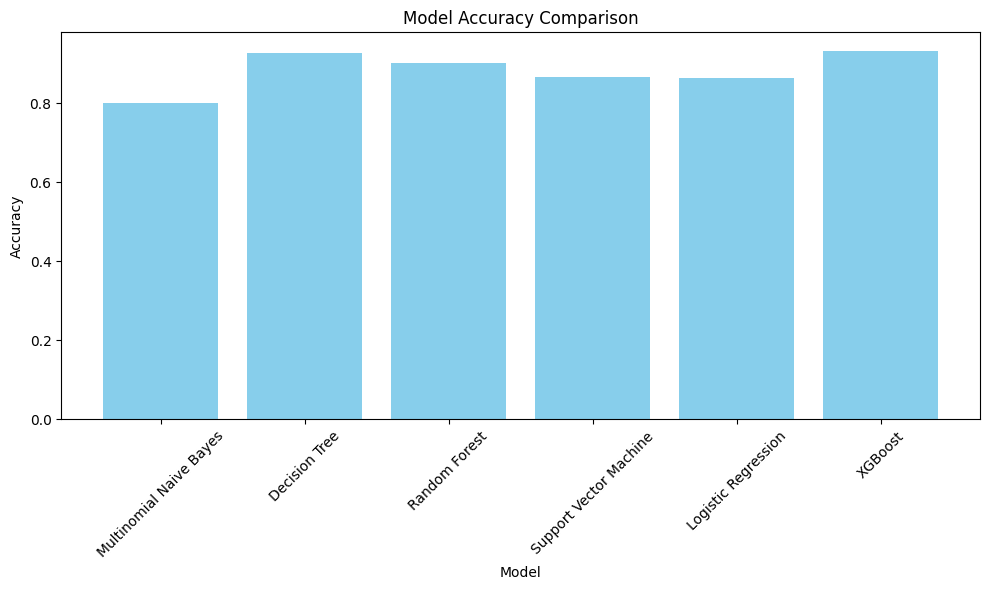

In [10]:
# Save results to a file
results_df = pd.DataFrame([{"Model": res["Model"], "Accuracy": res["Accuracy"]} for res in results])
results_df.to_csv("results_summary.csv", index=False)

# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_comparison.png")
plt.show()

In [11]:
# # Use Decision Tree 

# classifier = DecisionTreeClassifier()

# # Create a pipeline with a text feature vectorizer (CountVectorizer), TfidfTransformer, and the Decision Tree classifier
# model = Pipeline([
#     ('vectorizer', vectorizer),
#     ('transformer', transformer),
#     ('classifier', classifier)
# ])

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(corpus, df['v1'], test_size=0.3, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Save the trained model to a file
# # Use joblib to save and load the model
# import joblib  
# joblib.dump(model, 'decision_tree_model.pkl')

In [12]:
# # # Later on(if you want to build an interface), when you want to use the model for predictions:

# # # Load the trained model from the file
# loaded_model = joblib.load('decision_tree_model.pkl')

# # # Input a new test case
# single_test_case = [input("Enter your test case: ")]

# # # Make predictions using the loaded model
# prediction = loaded_model.predict(single_test_case)

# # # Display the result
# print(f'Test Case: {single_test_case[0]}')
# print(f'Prediction: {prediction[0]}')


In [13]:
# # # Later on(if you want to build an interface), when you want to use the model for predictions:

# # # Load the trained model from the file
# loaded_model = joblib.load('decision_tree_model.pkl')

# # # Input a new test case
# single_test_case = [input("Enter your test case: ")]

# # # Make predictions using the loaded model
# prediction = loaded_model.predict(single_test_case)

# # # Display the result
# print(f'Test Case: {single_test_case[0]}')
# print(f'Prediction: {prediction[0]}')